In [ ]:
!pip install image-quality
import imquality.brisque as brisque
import PIL.Image

     |████████████████████████████████| 146 kB 6.9 MB/s 
     |████████████████████████████████| 170 kB 67.4 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233361 sha256=abbf4dce9c89890e90b2a53551b0061ab4b986b61183bef3ddf2f0a3956620a3
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e3513
Successfully built libsvm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
from os import listdir
from os.path import isfile, join
mypath = '/content/drive/MyDrive/images/'
file_path=glob.glob("/content/drive/MyDrive/images/*.*")
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['forest.jpg', 'fourierspectrum.jpg', 'trees.jpg', 'woman.jpg', 'asterix.jpg']

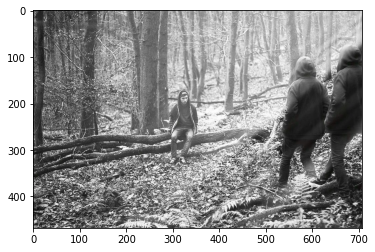

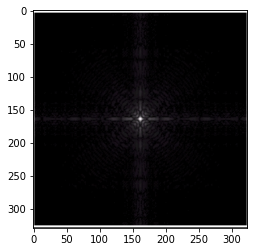

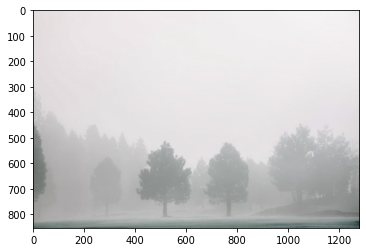

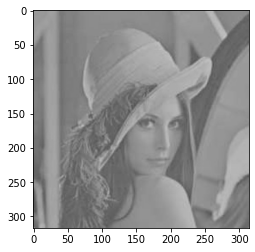

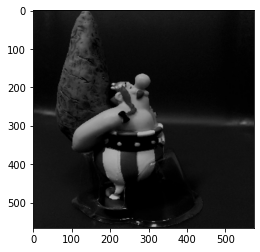

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 
from PIL import Image as PImage
images = []
for image in file_path:
    img = cv2.imread(image) 
    images.append(img)
    #plt.imshow(images) 
    #plt.show()
for img in images:  
  #byte_io = BytesIO()
  #img.save(byte_io, 'jpeg')
  plt.imshow(img)
  plt.show()    
    

Original STD: 66.11593572849173


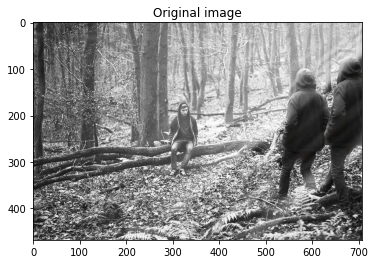

STD log: 35.95138355678898


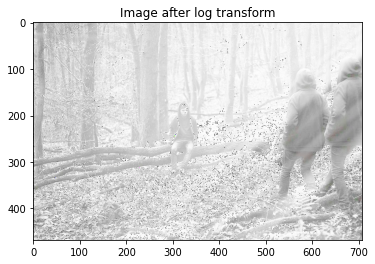

Original STD: 38.963536833464836


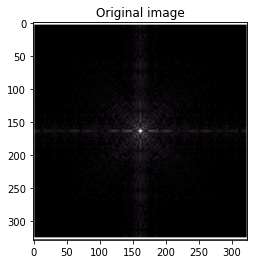

STD log: 56.69782116907612


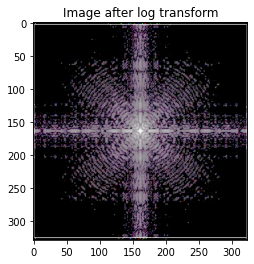

Original STD: 33.558725951342126


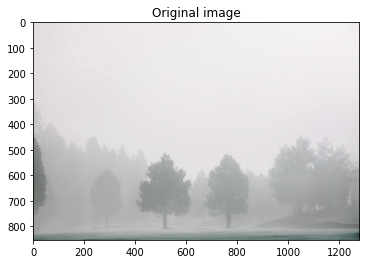

STD log: 8.29913210391463


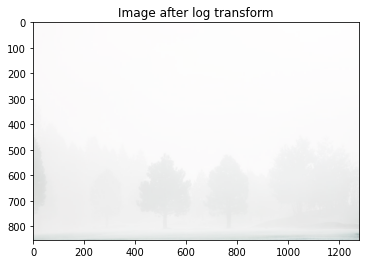

Original STD: 22.526223336670466


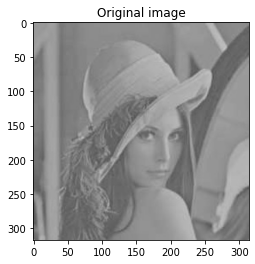

STD log: 8.075567648791722


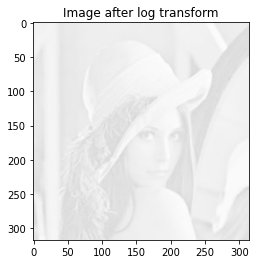

Original STD: 33.51584610224237


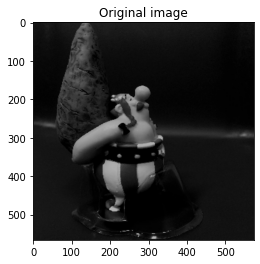

STD log: 51.52347933160828


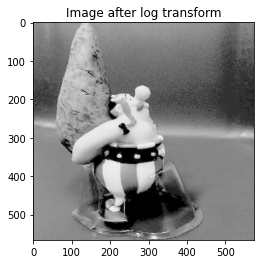

In [74]:
for image in images:
    
    c = 255 / np.log(1 + np.max(image)) 
    log_image = c * (np.log(np.array(image) + 1)) 
    log_image = np.array(log_image, dtype = np.uint8) 
    plt.imshow(image) 
    print(f'Original STD: {image.std()}')
    plt.title('Original image')
    plt.show() 
    plt.imshow(log_image) 
    print(f'STD log: {log_image.std()}')
    plt.title('Image after log transform')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


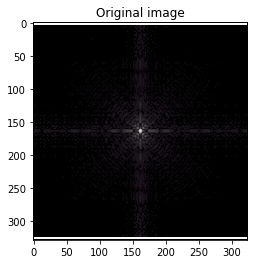

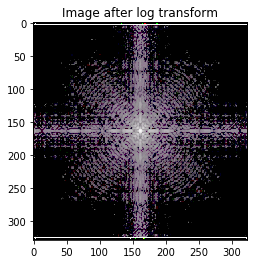

In [ ]:
# Apply log transformation method 
c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
   
# Display both images 
plt.imshow(image) 
plt.title('Original image')
plt.show() 
plt.imshow(log_image) 
plt.title('Image after log transform')
plt.show() 

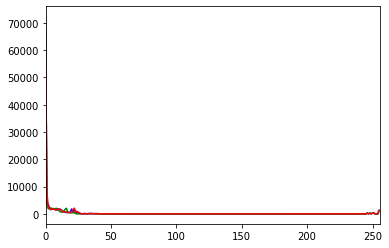

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show() 

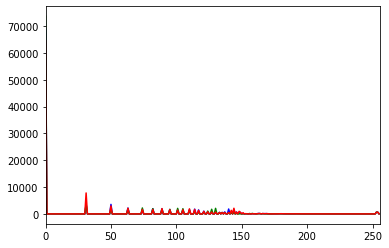

In [ ]:
 # Histogram plotting of the 
# log transformed image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([log_image],  
                         [i], None, 
                         [256], 
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show()

# Contrast stretching

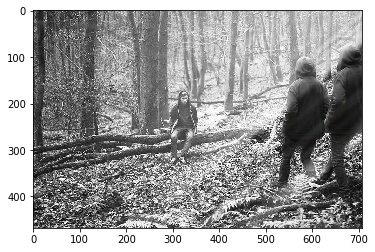

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 
'''
Contrast stretching (often called normalization) is a 
simple image enhancement technique that attempts to 
improve the contrast in an image by `stretching' 
the range of intensity values it contains 
to span a desired range of values,
e.g. the the full range of pixel values that the
image type concerned allows. 
It differs from the more sophisticated histogram equalization 
in that it can only apply a linear scaling function to the 
image pixel values. As a result the `enhancement' is less harsh. 
(Most implementations accept a graylevel image as input and produce another graylevel image as output.)
'''

# Read an image 
image_forest = cv2.imread('images/forest.jpg') 
plt.imshow(image_forest) 
plt.show()

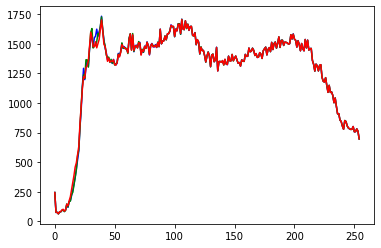

In [ ]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([image_forest],  
                         [i], None, 
                         [255],  
                         [0, 255]) 
      
    plt.plot(histr, color = col)       
    
      
plt.show() 

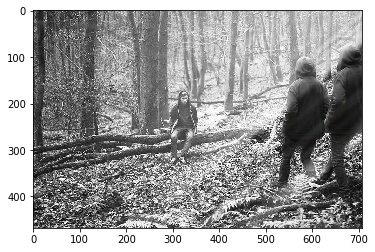

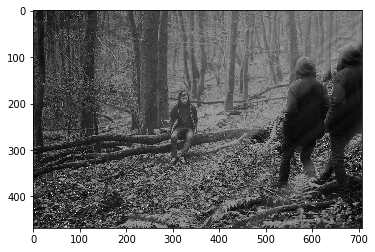

In [ ]:
# Apply contrast stretching method 
maxiI = 250
miniI = 3

maxoI = 155 
minoI = 0

stretched_image = image_forest.copy()
# get height and width of the image 
height, width, _ = image_forest.shape 
  
for i in range(0, height - 1): 
    for j in range(0, width - 1): 
          
        # Get the pixel value 
        pixel = stretched_image[i, j] 
          
        # scale each pixel by this formula
        '''
        pout = (pin - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
        
        '''
        
          
        # 1st index contains red pixel 
        pixel[0] = (pixel[0] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI  
          
        # 2nd index contains green pixel 
        pixel[1] = (pixel[1] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # 3rd index contains blue pixel 
        pixel[2] = (pixel[2] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
        # Store new values in the pixel 
        stretched_image[i, j] = pixel 
  

#original image
plt.imshow(image_forest) 
plt.show()

#stretched image
plt.imshow(stretched_image) 
plt.show() 

In [ ]:
print(f'Original: {brisque.score(image_forest)}')
print(f'After stretching: {brisque.score(stretched_image)}')

print(f'Original STD: {image_forest.std()}')
print(f'STD after stretching: {stretched_image.std()}')

Original: 19.34566785652575
After stretching: 18.703392301683124
Original STD: 66.11593572849173
STD after stretching: 41.900060807467256


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Brisque score original: 19.345667856511653
Original STD: 66.11593572849173
Brisque after stretching: 18.703392301688467
STD after stretching: 41.900060807467256


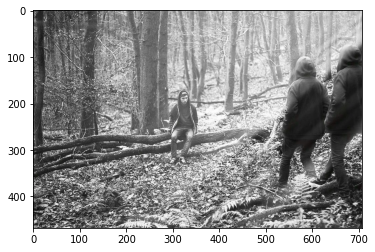

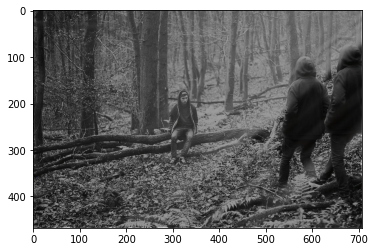

Brisque score original: 83.10865859841462
Original STD: 38.963536833464836
Brisque after stretching: 163.06674273798316
STD after stretching: 113.87803497802072


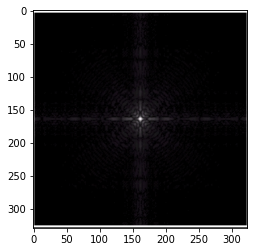

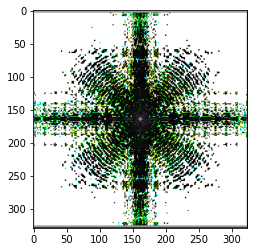

Brisque score original: 89.47851196394552
Original STD: 33.558725951342126
Brisque after stretching: 99.25444391251014
STD after stretching: 21.087732069385


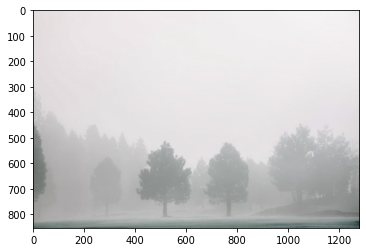

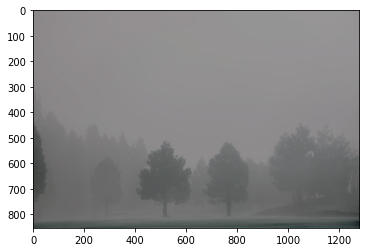

Brisque score original: 35.04658536131578
Original STD: 22.526223336670466
Brisque after stretching: 44.10715294291467
STD after stretching: 14.843674430405116


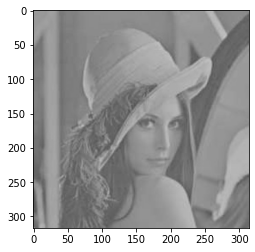

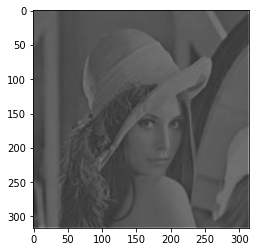

Brisque score original: 38.66535349299224
Original STD: 33.51584610224237
Brisque after stretching: 48.583573632851966
STD after stretching: 63.795726251298476


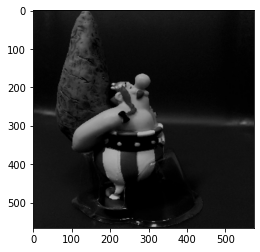

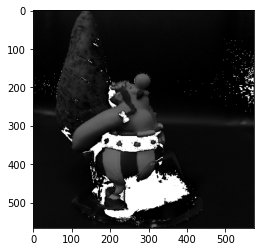

In [ ]:
# Apply contrast stretching method 
maxiI = 250
miniI = 3

maxoI = 155 
minoI = 0

for image in images:
  stretched_image = image.copy()
  # get height and width of the image 
  height, width, _ = image.shape 
    
  for i in range(0, height - 1): 
      for j in range(0, width - 1): 
            
          # Get the pixel value 
          pixel = stretched_image[i, j] 
            
          # scale each pixel by this formula
          '''
          pout = (pin - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
          
          '''
          
            
          # 1st index contains red pixel 
          pixel[0] = (pixel[0] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI  
            
          # 2nd index contains green pixel 
          pixel[1] = (pixel[1] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
            
          # 3rd index contains blue pixel 
          pixel[2] = (pixel[2] - miniI) * ((maxoI-minoI) / (maxiI-miniI)) + minoI 
            
          # Store new values in the pixel 
          stretched_image[i, j] = pixel 
    

  #original image
  print(f'Brisque score original: {brisque.score(image)}')
  print(f'Original STD: {image.std()}')
  print(f'Brisque after stretching: {brisque.score(stretched_image)}')
  print(f'STD after stretching: {stretched_image.std()}')
  plt.imshow(image) 
  plt.show()

  #stretched image
 
  plt.imshow(stretched_image) 

  plt.show() 

# Power Law ( Gamma) Transformation

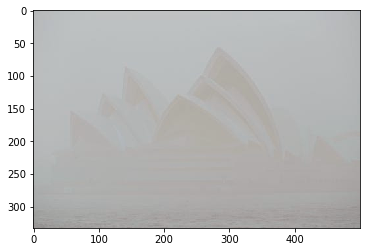

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 


# Read an image 
image_sydney = cv2.imread('images/sydney.jpeg') 
plt.imshow(image_sydney) 


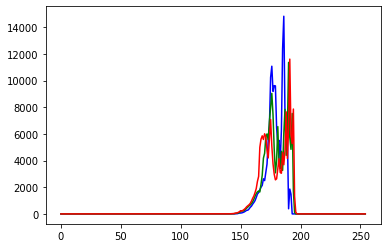

In [ ]:
# Histogram plotting of the image 
colors = ('b', 'g', 'r') 
MAX = 255  
for i, color in enumerate(colors): 
      
    hist = cv2.calcHist([image_sydney],  
                         [i], None, 
                         [MAX],  
                         [0, MAX]) 
      
    plt.plot(hist, color = color) 
       
    
      
plt.show() 

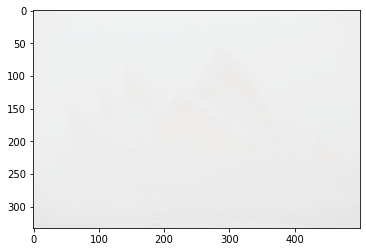

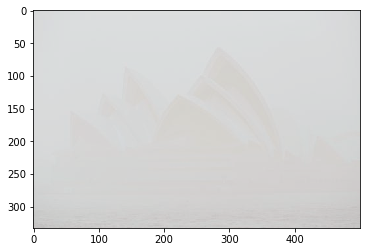

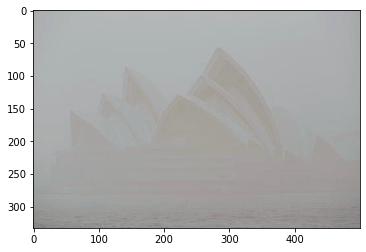

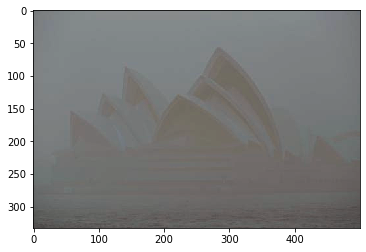

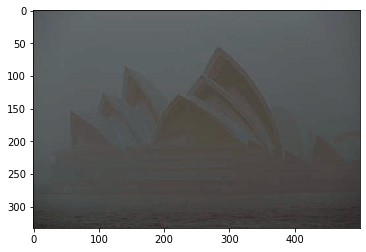

In [ ]:
# Trying 4 gamma values. 
for gamma in [0.2, 0.5, 1.2, 2.2, 3.2]: 

    # Apply gamma correction. 
    gamma_correction = np.array(MAX*(image_sydney / MAX) ** gamma, dtype = 'uint8') 
    plt.imshow(gamma_correction) 
    plt.show() 

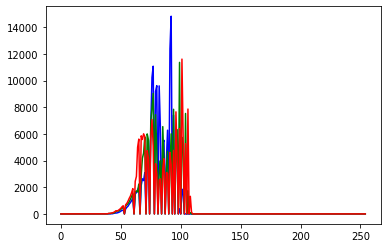

In [ ]:
# Histogram plotting of the 
# log transformed image 
colors = ('b', 'g', 'r') 
MAX = 255  
for i, color in enumerate(colors): 
      
    hist = cv2.calcHist([gamma_correction],  
                         [i], None, 
                         [MAX],  
                         [0, MAX]) 
      
    plt.plot(hist, color = color) 
       
    
      
plt.show() 

In [ ]:
print(f'Original: {brisque.score(image_sydney)}')
print(f'After gamma_correction: {brisque.score(gamma_correction)}')

Original: 71.42244522896951
After gamma_correction: 63.851934176177764


In [ ]:
for gamma in [0.2, 0.5, 1.2, 2.2, 3.2]: 

    gamma_correction = np.array(MAX*(image_sydney / MAX) ** gamma, dtype = 'uint8')
    print(f'After gamma correction {gamma}: {brisque.score(gamma_correction)}')

After gamma correction 0.2: 102.22902991885317
After gamma correction 0.5: 84.35449547570457
After gamma correction 1.2: 68.7066684052281
After gamma correction 2.2: 63.72833212839359
After gamma correction 3.2: 63.851934176177764


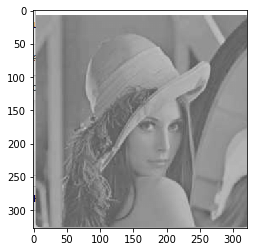

In [ ]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 


# Read an image 
image_lena = cv2.imread('images/woman.png') 
plt.imshow(image_lena) 

Original brisque score: 36.35189166347524
Original std: 29.01774279822481
Brisque score for gamma correction 0.2: 49.147964404232965
STD After gamma correction 0.2: 9.2578655629029


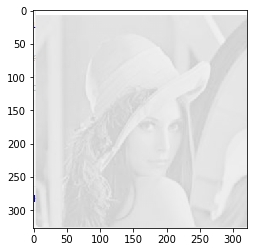

Brisque score for gamma correction 0.5: 39.14459798075163
STD After gamma correction 0.5: 18.930041757810066


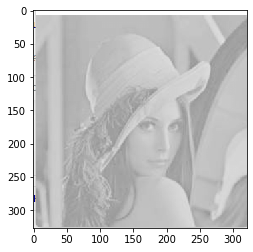

Brisque score for gamma correction 1.2: 36.28448970822339
STD After gamma correction 1.2: 31.663044142155638


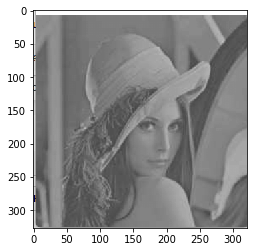

Brisque score for gamma correction 2.2: 37.90190424926672
STD After gamma correction 2.2: 37.440160459568716


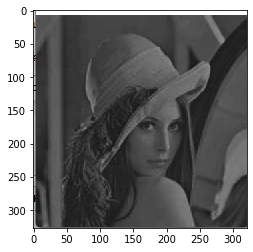

Brisque score for gamma correction 3.2: 42.57701183775302
STD After gamma correction 3.2: 38.34998060818736


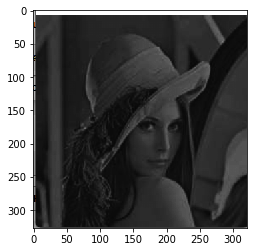

In [ ]:
print(f'Original brisque score: {brisque.score(image_lena)}')
print(f'Original std: {image_lena.std()}')
for gamma in [0.2, 0.5, 1.2, 2.2, 3.2]: 

    # Apply gamma correction. 
    gamma_corrected_lena = np.array(MAX*(image_lena / MAX) ** gamma, dtype = 'uint8') 
    
    plt.imshow(gamma_corrected_lena) 
    print(f'Brisque score for gamma correction {gamma}: {brisque.score(gamma_corrected_lena)}')
    print(f'STD After gamma correction {gamma}: {gamma_corrected_lena.std()}')
    
    plt.show() 

In [ ]:
print(f'Original std: {image_lena.std()}')

Original std: 29.01774279822481


Original brisque score: 19.345667856511653
Original std: 66.11593572849173
Brisque score for gamma correction 0.2: 11.864192313946859
STD After gamma correction 0.2: 27.5559009924281


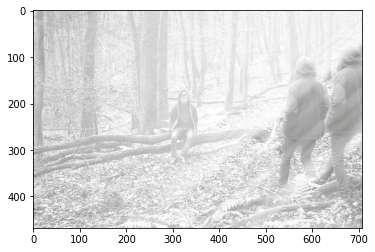

Brisque score for gamma correction 0.5: 16.875408586815496
STD After gamma correction 0.5: 50.19622582967484


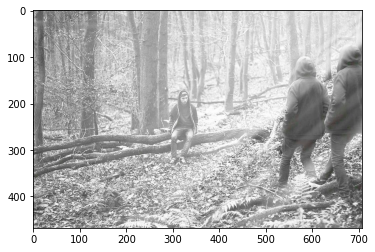

Brisque score for gamma correction 1.2: 19.12678012465912
STD After gamma correction 1.2: 68.70781707929787


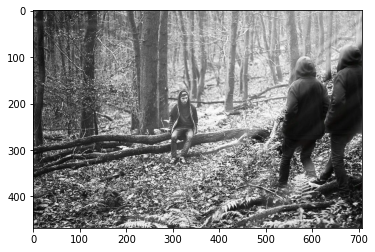

Brisque score for gamma correction 2.2: 19.023784726246703
STD After gamma correction 2.2: 70.12119116174753


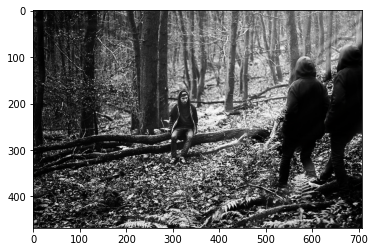

Brisque score for gamma correction 3.2: 28.54816644445802
STD After gamma correction 3.2: 65.9001535203249


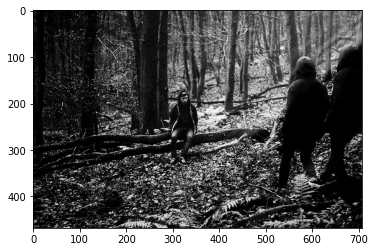

Original brisque score: 83.10865859841462
Original std: 38.963536833464836
Brisque score for gamma correction 0.2: 143.34947590660906
STD After gamma correction 0.2: 69.1138305659262


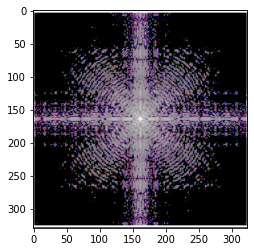

Brisque score for gamma correction 0.5: 120.00680366333873
STD After gamma correction 0.5: 44.57863957699733


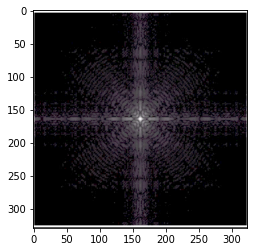

Brisque score for gamma correction 1.2: 78.85906848355407
STD After gamma correction 1.2: 38.55969455604517


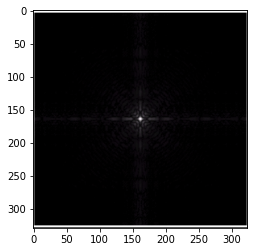

Brisque score for gamma correction 2.2: 89.98494095595615
STD After gamma correction 2.2: 37.89467105144661


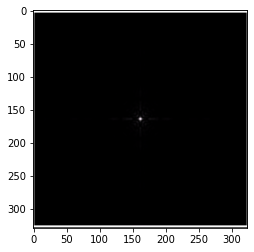

Brisque score for gamma correction 3.2: 113.71695645497431
STD After gamma correction 3.2: 37.32723524742521


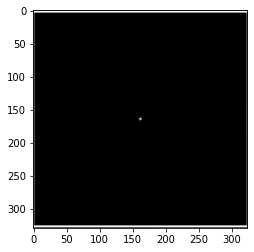

Original brisque score: 89.47851196394552
Original std: 33.558725951342126
Brisque score for gamma correction 0.2: 110.27356823927377
STD After gamma correction 0.2: 8.648739184062148


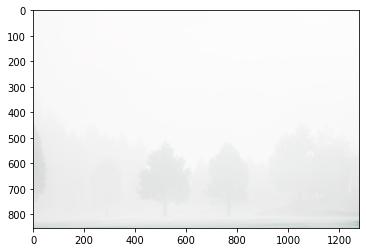

Brisque score for gamma correction 0.5: 99.14447837997719
STD After gamma correction 0.5: 19.588570602188025


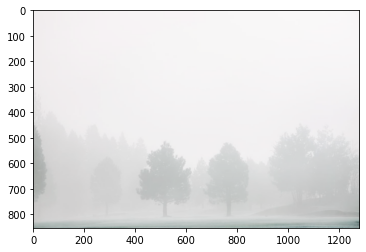

Brisque score for gamma correction 1.2: 87.30377141950342
STD After gamma correction 1.2: 37.97292974886835


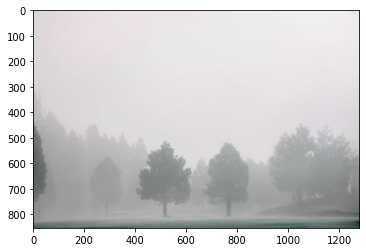

Brisque score for gamma correction 2.2: 81.73857998080538
STD After gamma correction 2.2: 52.850876070929985


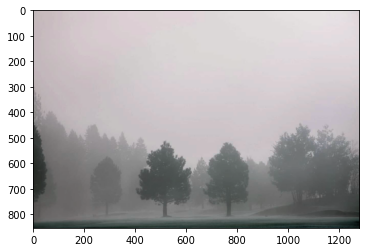

Brisque score for gamma correction 3.2: 80.69558565147028
STD After gamma correction 3.2: 59.56607009000076


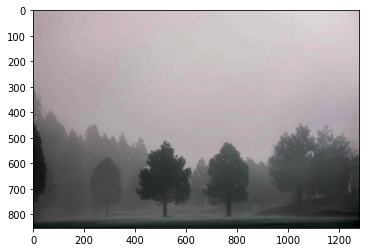

Original brisque score: 35.04658536131578
Original std: 22.526223336670466
Brisque score for gamma correction 0.2: 49.48952406904013
STD After gamma correction 0.2: 7.560761809826445


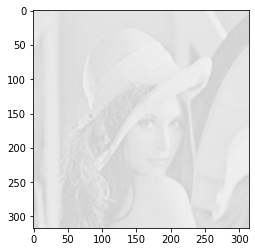

Brisque score for gamma correction 0.5: 38.18698079279622
STD After gamma correction 0.5: 15.509951976056094


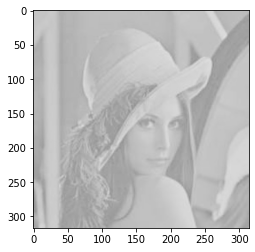

Brisque score for gamma correction 1.2: 34.64695728209992
STD After gamma correction 1.2: 23.90371969333345


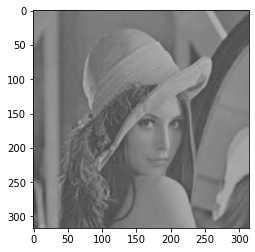

Brisque score for gamma correction 2.2: 35.63227458437436
STD After gamma correction 2.2: 23.650820390962934


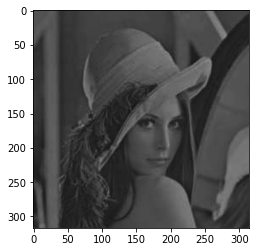

Brisque score for gamma correction 3.2: 39.21822925178273
STD After gamma correction 3.2: 19.13126101503962


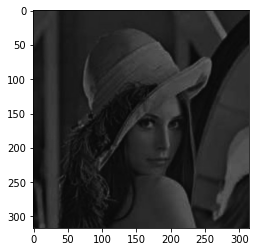

Original brisque score: 38.66535349299224
Original std: 33.51584610224237
Brisque score for gamma correction 0.2: 23.210494535028005
STD After gamma correction 0.2: 44.930759517442574


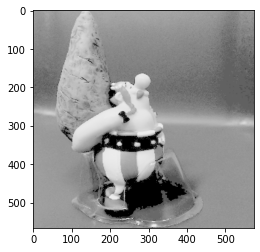

Brisque score for gamma correction 0.5: 26.51407219519021
STD After gamma correction 0.5: 42.080329702582894


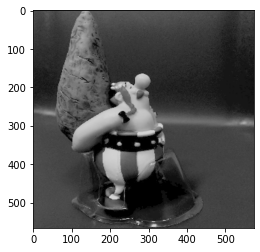

Brisque score for gamma correction 1.2: 45.697408791057654
STD After gamma correction 1.2: 30.253344711469413


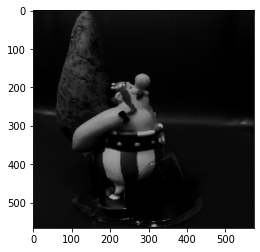

Brisque score for gamma correction 2.2: 95.422491285755
STD After gamma correction 2.2: 19.23791990613625


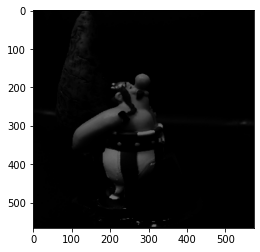

Brisque score for gamma correction 3.2: 102.62055596839346
STD After gamma correction 3.2: 14.117117237972115


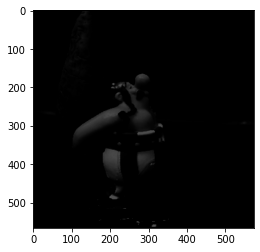

In [ ]:
MAX= 256
for image in images:

  print(f'Original brisque score: {brisque.score(image)}')
  print(f'Original std: {image.std()}')
  for gamma in [0.2, 0.5, 1.2, 2.2, 3.2]: 

      # Apply gamma correction. 
      gamma_corrected = np.array(MAX*(image/ MAX) ** gamma, dtype = 'uint8') 
      
      plt.imshow(gamma_corrected) 
      print(f'Brisque score for gamma correction {gamma}: {brisque.score(gamma_corrected)}')
      print(f'STD After gamma correction {gamma}: {gamma_corrected.std()}')
      
      plt.show() 

Inspired by
https://github.com/Shahir-Abdullah/Digital-Image-Processing